In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def flatten(x):
    return [y for l in x for y in flatten(l)] if type(x) is list else [x]

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df_length = len(train_df)
test_df_length = len(test_df)

print("训练集数据量", str(train_df_length))
print("测试集数据量", str(test_df_length))

训练集数据量 404267
测试集数据量 2345796


In [3]:
positive_df = train_df[train_df['is_duplicate'] == 1]
positive_df_length = len(positive_df)

print("其中相似的句子数据量", str(positive_df_length))
print("占比 %.2f" % (positive_df_length/train_df_length*100))
print("其中不相似的句子数据量", str(train_df_length - positive_df_length))
print("占比 %.2f" % (100 - positive_df_length/train_df_length*100))

其中相似的句子数据量 149262
占比 36.92
其中不相似的句子数据量 255005
占比 63.08


In [13]:
from keras.preprocessing.text import Tokenizer

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df["question1"] = train_df["question1"].fillna("")
train_df["question2"] = train_df["question2"].fillna("")
test_df["question1"] = test_df["question1"].fillna("")
test_df["question2"] = test_df["question2"].fillna("")

texts_1 = train_df["question1"].tolist()
texts_2 = train_df["question2"].tolist()
test_texts_1 = test_df["question1"].tolist()
test_texts_2 = test_df["question2"].tolist()

tokenizer = Tokenizer(num_words=200000)
tokenizer.fit_on_texts(texts_1 + texts_2 + test_texts_1 + test_texts_2)

sequences_1 = tokenizer.texts_to_sequences(texts_1)
sequences_2 = tokenizer.texts_to_sequences(texts_2)
test_sequences_1 = tokenizer.texts_to_sequences(test_texts_1)
test_sequences_2 = tokenizer.texts_to_sequences(test_texts_2)

# 句子 铺平成 词语
word_sequences_1 = set(flatten(sequences_1))
word_sequences_2 = set(flatten(sequences_2))
word_test_sequences_1 = set(flatten(test_sequences_1))
word_test_sequences_2 = set(flatten(test_sequences_2))

print("训练集词表数量:%d" % (len(word_sequences_1.union(word_sequences_2))))
print("测试集词表数量:%d" % (len(word_test_sequences_1.union(word_test_sequences_2))))
print("测试集中有多少词汇不在训练集里:%d" % (len(word_test_sequences_1.union(word_test_sequences_2) - word_sequences_1.union(word_sequences_2))))




训练集词表数量:95588
测试集词表数量:101312
测试集中有多少词汇不在训练集里:41448


In [14]:
train_sequences_lengths = [len(words) for words in sequences_1 + sequences_2]
train_sequences_avg = sum(train_sequences_lengths)/len(train_sequences_lengths)
test_sequences_lengths = [len(words) for words in test_sequences_1 + test_sequences_2]
test_sequences_avg = sum(test_sequences_lengths)/len(test_sequences_lengths)
print("训练集句子平均长度:%f" % train_sequences_avg)
print("测试集句子平均长度:%f" % test_sequences_avg)

训练集句子平均长度:11.156341
测试集句子平均长度:11.123814


句子出现频次 与 is_duplicate 的线性相关性


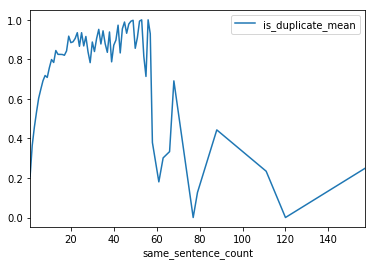

In [93]:
train_df = pd.read_csv('train.csv')

# 把所有qid对应的is_duplicate 关系tuple求出来
qid1_tp = [tuple(x) for x in train_df[['qid1','is_duplicate']].values]
qid2_tp = [tuple(x) for x in train_df[['qid2','is_duplicate']].values]
qid_tp = qid1_tp + qid2_tp

qid_is_duplicate_df = pd.DataFrame(qid_tp, columns=['qid', 'is_duplicate'])

# 求出 相同问题个数 与 平均是否重复的值
mean_array = qid_is_duplicate_df.groupby(['qid']).mean().values.ravel()
count_array = qid_is_duplicate_df.groupby(['qid']).count().values.ravel()
count_mean_df = pd.DataFrame({'count': count_array, 'mean': mean_array}, columns=['count', 'mean'])

count_mean_statistics_df = count_mean_df.groupby(['count']).mean()
mean_array2 = count_mean_statistics_df['mean'].tolist()
count_array2 = count_mean_statistics_df.index.tolist()
count_mean_df2 = pd.DataFrame({'same_sentence_count': count_array2, 'is_duplicate_mean': mean_array2})

print("句子出现频次 与 is_duplicate 的线性相关性")
count_mean_df2.plot('same_sentence_count', 'is_duplicate_mean')